<a href="https://colab.research.google.com/github/eric-pding/RSM8413_Group_Assignments/blob/main/RSM8413_Group_Assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# add some text

# RSM8413 Group Assignment 2

In [ ]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import graphviz
import seaborn as sns
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score

In [ ]:
!pip install dmba

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 20.1 MB/s eta 0:00:00


In [ ]:
from dmba import classificationSummary

In [ ]:
%matplotlib inline

# Data Preprocessing

In [ ]:
# Reading in the file
xlsx = 'https://github.com/amss330/Data/raw/039493dec4c56ec4008de0a8146908ddab4293c4/ebayAuctions.xlsx'
Ebay = pd.read_excel(xlsx, 'eBay auctions')
Ebay.head()

,Category,Currency,sellerRating,Duration,endDay,ClosePrice,OpenPrice,Competitive?
0,Music/Movie/Game,US,3249,5,Mon,0.01,0.01,0
1,Music/Movie/Game,US,3249,5,Mon,0.01,0.01,0
2,Music/Movie/Game,US,3249,5,Mon,0.01,0.01,0
3,Music/Movie/Game,US,3249,5,Mon,0.01,0.01,0
4,Music/Movie/Game,US,3249,5,Mon,0.01,0.01,0


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
Ebay.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1972 entries, 0 to 1971
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Category      1972 non-null   object 
 1   Currency      1972 non-null   object 
 2   sellerRating  1972 non-null   int64  
 3   Duration      1972 non-null   int64  
 4   endDay        1972 non-null   object 
 5   ClosePrice    1972 non-null   float64
 6   OpenPrice     1972 non-null   float64
 7   Competitive?  1972 non-null   int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 123.4+ KB


In [ ]:
# Creating dummy variables for the categorical predictors
# Predictor: Category
name_category = Ebay['Category'].value_counts().index
map_category = {}
for i in range(len(name_category)):
  map_category[name_category[i]] = i

Ebay['Category'] = Ebay['Category'].map(map_category)

# Predictor: Currency
name_currency = Ebay['Currency'].value_counts().index
map_currency = {}
for i in range(len(name_currency)):
  map_currency[name_currency[i]] = i

Ebay['Currency'] = Ebay['Currency'].map(map_currency)

# Predictor: EndDay
name_day = Ebay['endDay'].value_counts().index
map_day = {}
for i in range(len(name_day)):
  map_day[name_day[i]] = i

Ebay['endDay'] = Ebay['endDay'].map(map_day)

In [ ]:
# Predictor: Duration
# Changing Duration from intgers to strings
ind = Ebay['Duration'].value_counts().index
for i in range(len(ind)):
  Ebay['Duration'] = Ebay['Duration'].replace(ind[i], str(ind[i]))


In [ ]:
# Converting Duration to dummy variables
name_duration = Ebay['Duration'].value_counts().index
map_duration = {}
for i in range(len(name_duration)):
  map_duration[name_duration[i]] = i

Ebay['Duration'] = Ebay['Duration'].map(map_duration)

In [ ]:
Ebay.head()

,Category,Currency,sellerRating,Duration,endDay,ClosePrice,OpenPrice,Competitive?
0,0,0,3249,1,0,0.01,0.01,0
1,0,0,3249,1,0,0.01,0.01,0
2,0,0,3249,1,0,0.01,0.01,0
3,0,0,3249,1,0,0.01,0.01,0
4,0,0,3249,1,0,0.01,0.01,0


In [ ]:
Ebay.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1972 entries, 0 to 1971
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Category      1972 non-null   int64  
 1   Currency      1972 non-null   int64  
 2   sellerRating  1972 non-null   int64  
 3   Duration      1972 non-null   int64  
 4   endDay        1972 non-null   int64  
 5   ClosePrice    1972 non-null   float64
 6   OpenPrice     1972 non-null   float64
 7   Competitive?  1972 non-null   int64  
dtypes: float64(2), int64(6)
memory usage: 123.4 KB


The details of the conversion is as follows:


1.   **Category**

          Music/Movie/Game:       0

          Collectibles:           1

          Toys/Hobbies:           2

          Automotive:             3

          Antique/Art/Craft:      4

          SportingGoods:          5

          Clothing/Accessories:   6

          Home/Garden:            7

          Jewelry:                8

          Health/Beauty:          9

          Electronics:            10

          Books:                  11
          
          Coins/Stamps:           12
          
          Computer:               13
          
          Pottery/Glass:          14

          Business/Industrial:    15
          
          EverythingElse:         16
          
          Photography:            17


2.   **Currency**
          
          US:       0

          EUR:      1

          GBP:      2

3.   **endDay**
          
          Mon:      0

          Sat:      1

          Sun:      2

          Fri:      3

          Thu:      4

          Tue:      5

          Wed:      6


4.   **Duration**

          7:        0
          5:        1
          10:       2
          3:        3
          1:        4



# Fitting A Classification Tree

In [ ]:
# Splitting the data into training and test datasets
X = Ebay.drop(columns = ['Competitive?'])
y = Ebay['Competitive?']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 1)

In [ ]:
# Fitting a classification tree using all predictors
fullClassTree = DecisionTreeClassifier(min_samples_split= 50, random_state = 1)

# Train the tree using X_train, y_train
fullClassTree.fit(X_train, y_train)

# Predicting using the X_test
y_predicted = fullClassTree.predict(X_test)

# Checking the accuracy
fullClassTree.score(X_test, y_test)

0.8162230671736375

In [ ]:
# Checking the accuracy on the test set
classificationSummary(y_test, fullClassTree.predict(X_test))

Confusion Matrix (Accuracy 0.8162)

       Prediction
Actual   0   1
     0 292  61
     1  84 352


In [ ]:
# Writing Down the results in term of rules
text_representation = tree.export_text(fullClassTree)
print(text_representation)

|--- feature_6 <= 3.62
|   |--- feature_5 <= 3.64
|   |   |--- feature_6 <= 0.94
|   |   |   |--- class: 1
|   |   |--- feature_6 >  0.94
|   |   |   |--- feature_6 <= 2.45
|   |   |   |   |--- feature_5 <= 2.24
|   |   |   |   |   |--- feature_5 <= 1.24
|   |   |   |   |   |   |--- feature_3 <= 2.50
|   |   |   |   |   |   |   |--- feature_2 <= 5245.50
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |--- feature_2 >  5245.50
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- feature_3 >  2.50
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- feature_5 >  1.24
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_5 >  2.24
|   |   |   |   |   |--- class: 1
|   |   |   |--- feature_6 >  2.45
|   |   |   |   |--- feature_2 <= 21.00
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_2 >  21.00
|   |   |   |   |   |--- feature_0 <= 10.50
|   |   |   |   |   |   |--- feature_2 <= 3887.50
|   |   |   

In [ ]:
with open('fullClassTree.log', 'w') as fout:
    fout.write(text_representation)

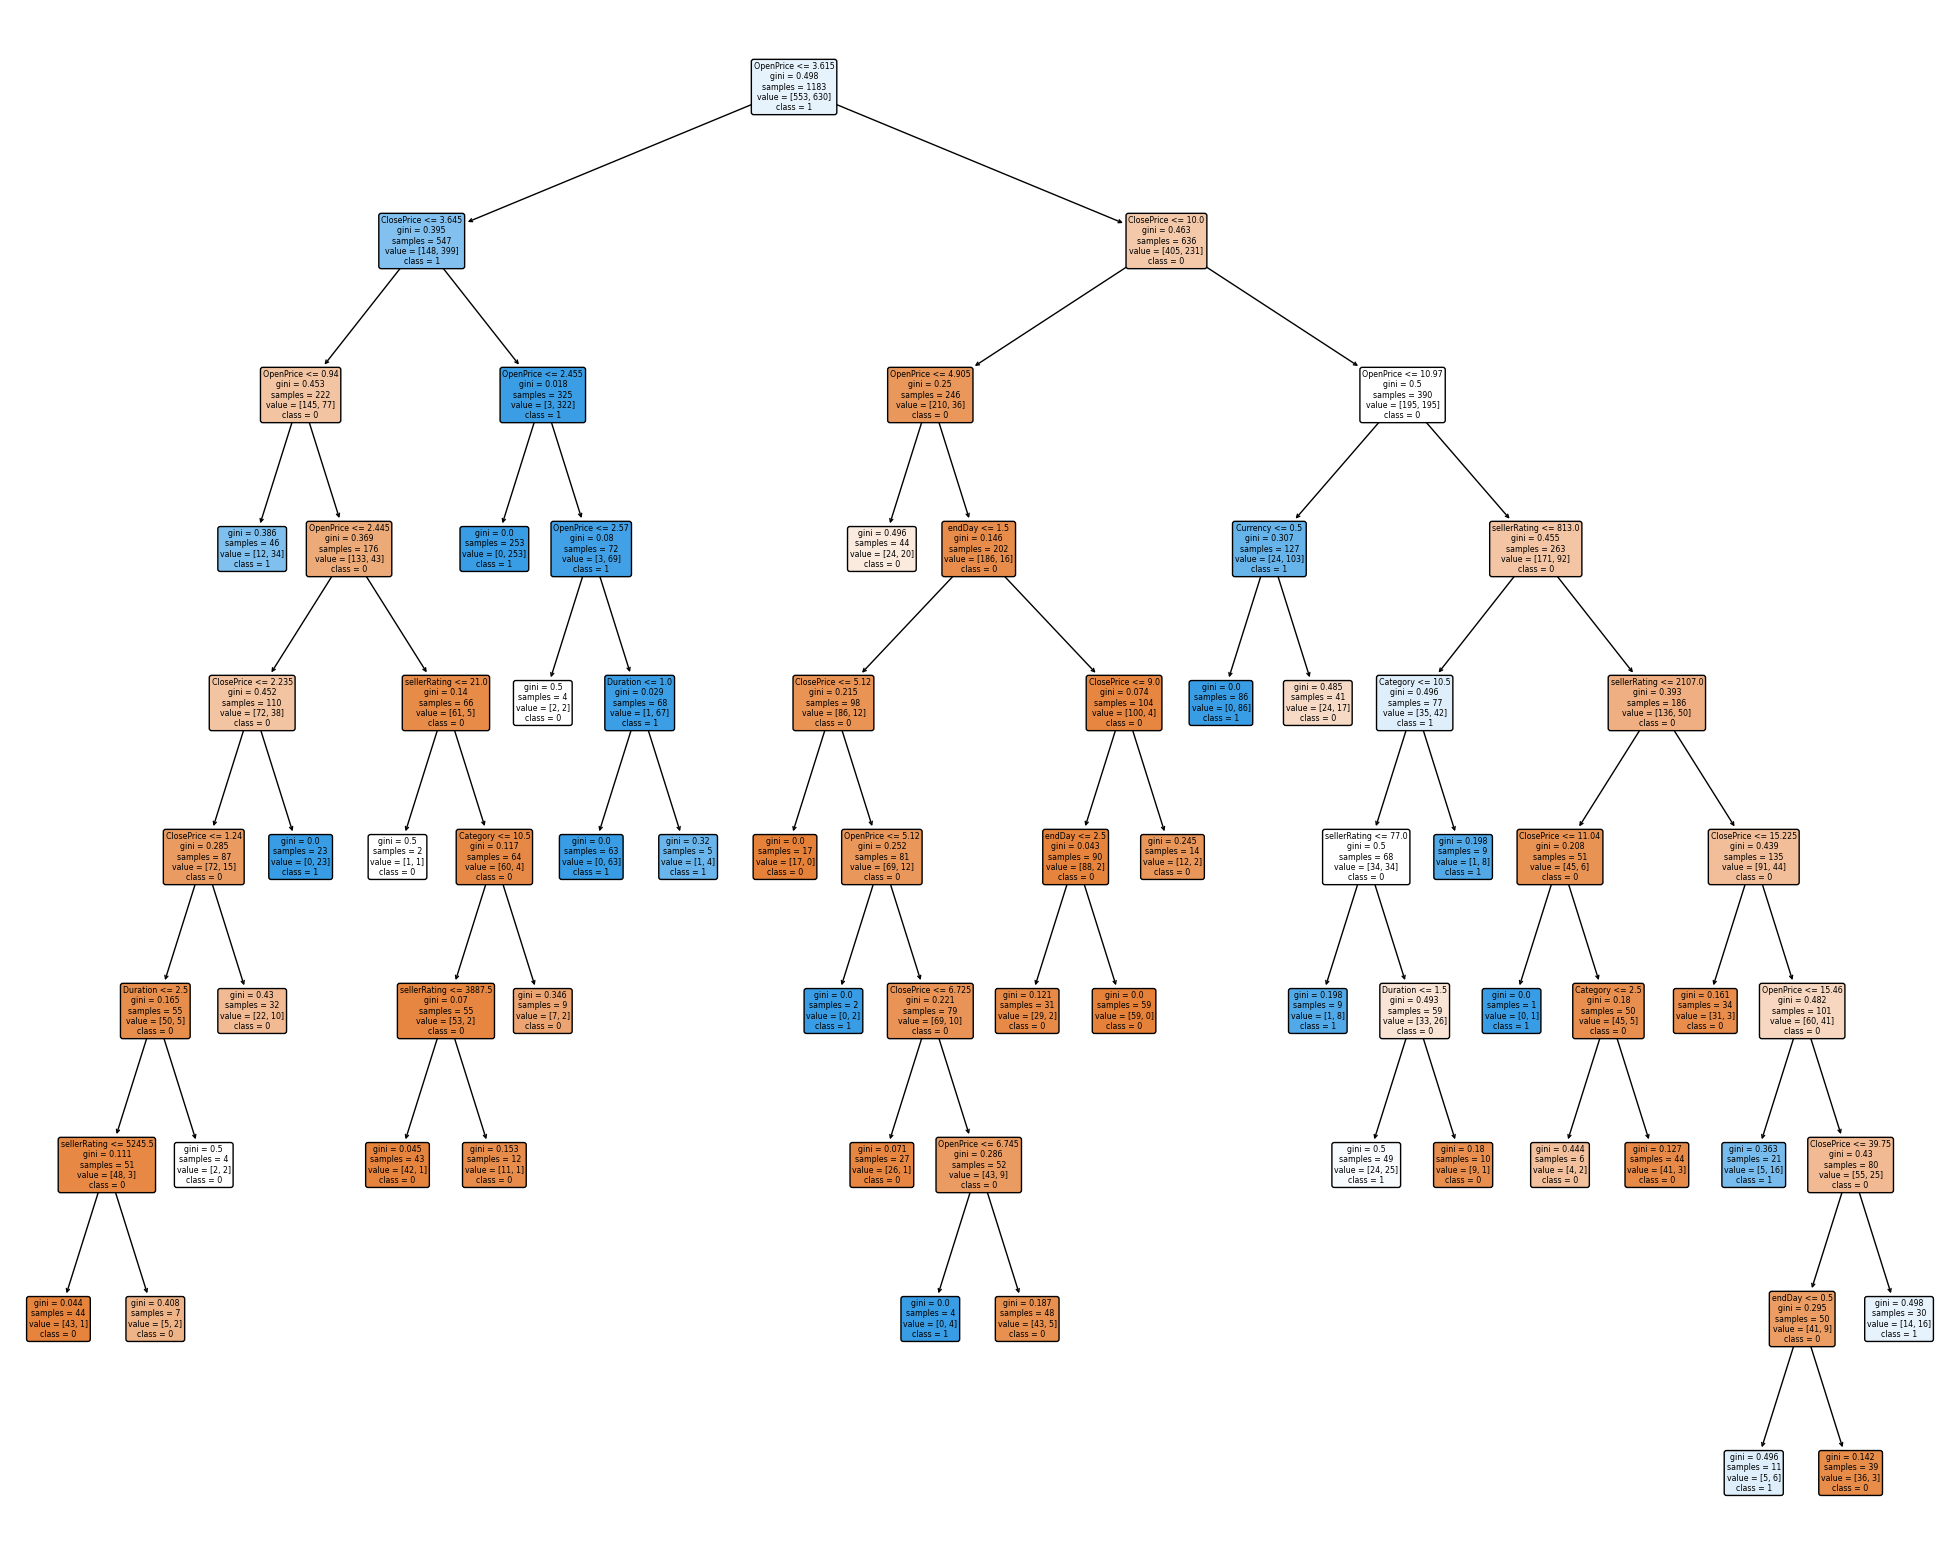

In [ ]:
# Generating a tree diagram from the Full Class Tree
feature_names = list(X.columns)
list_int = list(y.unique())
class_names = list(map(str, list_int))

fig = plt.figure(figsize = (25, 20))
tree.plot_tree(fullClassTree, feature_names = feature_names, class_names = class_names,
              rounded = True, filled = True)
fig.savefig('fullClassTree.png')

export_graphviz(fullClassTree, out_file = 'fullClassTree.dot', feature_names = feature_names,
                class_names = class_names, rounded = True, filled = True)

In [ ]:
# Feature Importance

# Extracting the importances by sklearn
Importances = fullClassTree.feature_importances_

# Creating a dictionary with the feature importance
feature_importance = {}
for i, feature in enumerate(feature_names):
    feature_importance[feature] = round(Importances[i], 3)

print(f"Feature importance: {feature_importance}")

Feature importance: {'Category': 0.009, 'Currency': 0.047, 'sellerRating': 0.041, 'Duration': 0.011, 'endDay': 0.012, 'ClosePrice': 0.465, 'OpenPrice': 0.415}


# Fitting a Classification Tree with only Relevant Predictors

In [ ]:
# Constructing a smaller tree
X_small = Ebay.drop(columns = ['Competitive?', 'endDay', 'Duration', 'Currency', 'Category', 'sellerRating'])
X_train, X_test, y_train, y_test = train_test_split(X_small, y, test_size = 0.4, random_state = 1)

In [ ]:
# Fitting a classification tree using all predictors
smallClassTree = DecisionTreeClassifier(min_samples_split= 50, random_state = 1)

# Train the tree using X_train, y_train
smallClassTree.fit(X_train, y_train)

# Predicting using the X_test
y_predicted = smallClassTree.predict(X_test)

# Checking the accuracy
smallClassTree.score(X_test, y_test)

0.8605830164765526

In [ ]:
# Checking the accuracy on the test set
classificationSummary(y_test, smallClassTree.predict(X_test))

Confusion Matrix (Accuracy 0.8606)

       Prediction
Actual   0   1
     0 314  39
     1  71 365


In [ ]:
# Text Representation of the Smaller Tree
text_representation_small = tree.export_text(smallClassTree)
print(text_representation_small)

with open('smallClassTree.log', 'w') as fout:
    fout.write(text_representation_small)

|--- feature_1 <= 3.62
|   |--- feature_0 <= 3.64
|   |   |--- feature_1 <= 0.94
|   |   |   |--- class: 1
|   |   |--- feature_1 >  0.94
|   |   |   |--- feature_1 <= 2.45
|   |   |   |   |--- feature_0 <= 2.24
|   |   |   |   |   |--- feature_0 <= 1.24
|   |   |   |   |   |   |--- feature_1 <= 1.03
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- feature_1 >  1.03
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- feature_0 >  1.24
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_0 >  2.24
|   |   |   |   |   |--- class: 1
|   |   |   |--- feature_1 >  2.45
|   |   |   |   |--- feature_1 <= 3.00
|   |   |   |   |   |--- feature_0 <= 3.28
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- feature_0 >  3.28
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_1 >  3.00
|   |   |   |   |   |--- class: 0
|   |--- feature_0 >  3.64
|   |   |--- feature_1 <= 2.46
|   |   |   |--- class: 1
|   |   |--- feature

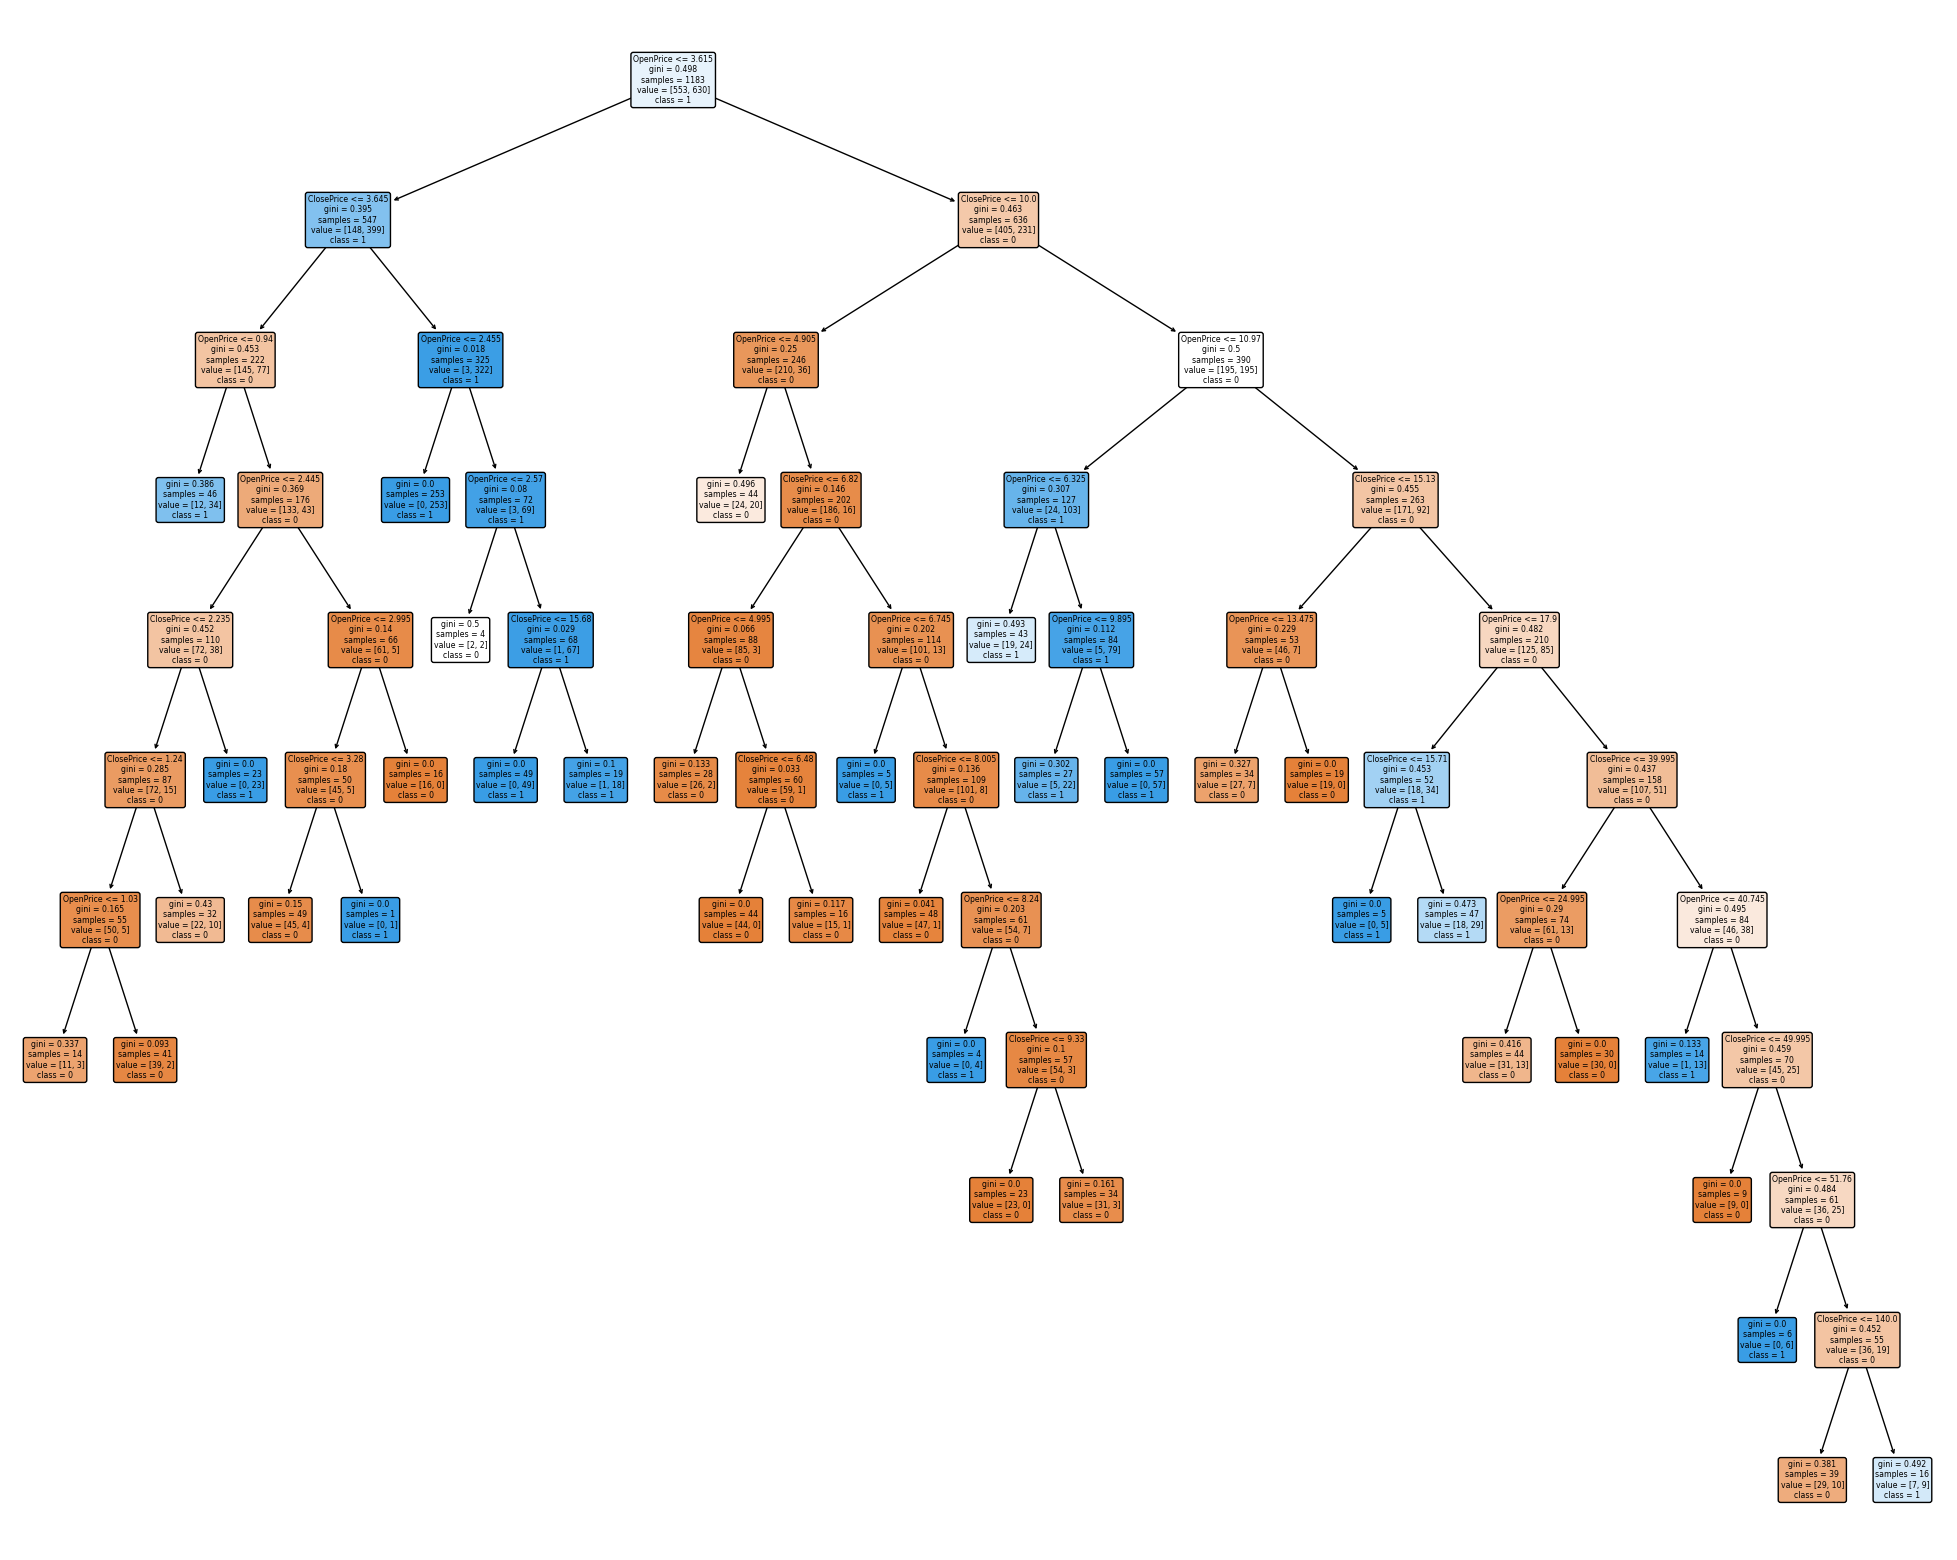

In [ ]:
# Generating a tree diagram from the Smaller Class Tree
feature_names = list(X_small.columns)
list_int = list(y.unique())
class_names = list(map(str, list_int))

fig = plt.figure(figsize = (25, 20))
tree.plot_tree(smallClassTree, feature_names = feature_names, class_names = class_names,
              rounded = True, filled = True)
fig.savefig('smallClassTree.png')

export_graphviz(smallClassTree, out_file = 'smallClassTree.dot', feature_names = feature_names,
                class_names = class_names, rounded = True, filled = True)

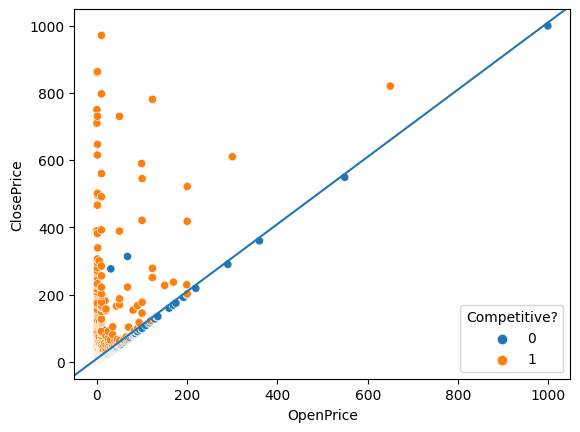

In [ ]:
# Scatter Plot of the Two Quantitative Predictors
sns.scatterplot(x = "OpenPrice", y = "ClosePrice", hue = "Competitive?", data = Ebay)
plt.axline((190, 200), (390, 400))